_Vanessa Sutandar_

_UPI: VASUT46_

_SN: 23219874_

_Candidate Number: HKHM3_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import skew, kurtosis
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
# Base directory where the data is stored
base_dir = "/Users/vanessasutandar/Documents/Network & Systemic Risk/Assignment data-20240405"

# Paths to the datasets
bank_assets_path = f"{base_dir}/bankAssetWeightedNetwork.csv"
bank_equities_path = f"{base_dir}/bankEquities.csv"
interbank_exposures_path = f"{base_dir}/interbankExposures.csv"

# Loading the datasets
bank_assets = pd.read_csv(bank_assets_path)
bank_equities = pd.read_csv(bank_equities_path, header=None).transpose()
interbank_exposures = pd.read_csv(interbank_exposures_path)

print(bank_assets.shape)
print(bank_equities.shape)
print(interbank_exposures.shape)

(144, 20)
(145, 1)
(144, 145)


In [3]:
import pandas as pd

# Load the datasets (assuming the paths are defined earlier in the code)
bank_assets = pd.read_csv(bank_assets_path, header=None)
bank_equities = pd.read_csv(bank_equities_path, header=None).squeeze()  # Squeeze to convert to Series
interbank_exposures = pd.read_csv(interbank_exposures_path, header=None)

# Drop the extra row from bank equities if it's not aligned with the rest
if bank_equities.shape[0] == interbank_exposures.shape[0] + 1:
    bank_equities = bank_equities.iloc[:-1]

# Calculate the total assets for each bank
total_assets = bank_assets.sum(axis=1).squeeze() + interbank_exposures.sum(axis=1).squeeze()

# Assuming the last column in interbank_exposures represents external liabilities
external_liabilities = interbank_exposures.iloc[:, -1].squeeze()

# Calculate interbank liabilities
interbank_liabilities = interbank_exposures.drop(columns=interbank_exposures.columns[-1]).sum(axis=1).squeeze()

# Now calculate the total liabilities
total_liabilities = total_assets - bank_equities

# Ensure all Series have the same index for proper alignment
total_assets.index = bank_assets.index
interbank_liabilities.index = bank_assets.index
external_liabilities.index = bank_assets.index

# Subtract interbank liabilities from total liabilities to get external liabilities
external_liabilities = total_liabilities - interbank_liabilities

# Create the DataFrame
balance_sheet_df = pd.DataFrame({
    'Total External Assets': bank_assets.sum(axis=1).squeeze(),
    'Interbank Assets': interbank_exposures.sum(axis=1).squeeze(),
    'Equity': bank_equities,
    'Total Assets': total_assets,
    'Interbank Liabilities': interbank_liabilities,
    'External Liabilities': external_liabilities
})

# Handle any remaining NAs
balance_sheet_df.fillna(0, inplace=True)

print(balance_sheet_df)


     Total External Assets  Interbank Assets      Equity  Total Assets  \
0                2154600.0      0.000000e+00    465710.0  2.154600e+06   
1                  29473.2      2.302500e+04      4436.7  5.249820e+04   
2                 156460.0      2.353800e+04     13159.0  1.799980e+05   
3              343060000.0      1.771697e+08  16229000.0  5.202297e+08   
4                1846500.0      1.084775e+06    438420.0  2.931275e+06   
..                     ...               ...         ...           ...   
140            301110000.0      4.305915e+07  11382000.0  3.441692e+08   
141            286542000.0      1.015331e+08  14033000.0  3.880751e+08   
142              1215600.0      5.896638e+05    129430.0  1.805264e+06   
143             15375200.0      7.209214e+05    874880.0  1.609612e+07   
144             84110000.0      2.440614e+07  26855000.0  1.085161e+08   

     Interbank Liabilities  External Liabilities  
0             0.000000e+00             1688890.0  
1        

In [28]:
print(bank_assets.shape)
print(bank_assets)

(145, 20)
            0           1          2         3           4           5   \
0          0.0         0.0        0.0  430920.0         0.0         0.0   
1       4912.2         0.0        0.0    4912.2         0.0         0.0   
2          0.0         0.0    39115.0       0.0     39115.0         0.0   
3          0.0  68612000.0        0.0       0.0         0.0  68612000.0   
4          0.0    615500.0        0.0       0.0         0.0    615500.0   
..         ...         ...        ...       ...         ...         ...   
140        0.0         0.0        0.0       0.0         0.0         0.0   
141        0.0  47757000.0        0.0       0.0         0.0         0.0   
142   303900.0         0.0        0.0       0.0         0.0         0.0   
143  3843800.0         0.0  3843800.0       0.0         0.0         0.0   
144        0.0  16822000.0        0.0       0.0  16822000.0         0.0   

              6          7          8            9           10          11  \
0         

**Quick Assessement:**
- Total External Assets column values are positive, as expected.
- Interbank Assets and Interbank Liabilities appear to balance out, indicating correct calculations across the interbank exposures.
- Equity values are in line and have been correctly paired with the corresponding bank's assets and liabilities.
- Total Assets are computed as the sum of interbank and external assets, aligning with financial principles.
- External Liabilities are calculated correctly as the difference between total assets, interbank liabilities, and equity.

In [4]:
# Check if the balance sheet balances for each bank
Balance_check = balance_sheet_df['Total Assets'] - (balance_sheet_df['Interbank Liabilities'] + balance_sheet_df['External Liabilities'] + balance_sheet_df['Equity'])

# Any row in 'Balance Check' not close to zero indicates a potential issue
print(Balance_check)


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
140    0.0
141    0.0
142    0.0
143    0.0
144    0.0
Length: 145, dtype: float64


In [5]:
# Flatten the matrices and exclude zeros for non-existent exposures
exposures = interbank_exposures.values[np.triu_indices_from(interbank_exposures, k=1)]
assets = bank_assets.values.flatten()

# Convert bank_equities DataFrame values to a NumPy array and then flatten
equities = bank_equities.values.flatten()

# Remove zeros for all datasets
exposures = exposures[exposures != 0]
assets = assets[assets != 0]
equities = equities[equities > 0]  # Assuming equities can't be negative or zero

# Task 1: Statistical Characterization and Topological Properties
## Statistical Characterization:

Present statistical characterization of the system for what concern the distributional properties of balance sheets and interbank exposures

### Descriptive Statistic 

In [6]:
# Define a function to calculate the descriptive statistics
def calculate_descriptive_stats(series):
    stats = {
        'mean': series.mean(),
        'median': series.median(),
        'variance': series.var(),
        'std_dev': series.std(),
        'skewness': series.skew(),
        'kurtosis': series.kurtosis()
    }
    return pd.Series(stats)

# Calculate statistics for each column of interest in the balance sheet
descriptive_stats_df = balance_sheet_df.apply(calculate_descriptive_stats)

# Print the descriptive statistics
print(descriptive_stats_df)

          Total External Assets  Interbank Assets        Equity  Total Assets  \
mean               6.699751e+07      1.672996e+07  6.881906e+06  8.372747e+07   
median             7.318800e+06      2.341852e+06  5.153100e+05  1.146570e+07   
variance           4.068171e+16      1.383359e+15  3.928654e+14  5.226561e+16   
std_dev            2.016971e+08      3.719354e+07  1.982083e+07  2.286167e+08   
skewness           7.766829e+00      3.279179e+00  5.355636e+00  6.672446e+00   
kurtosis           7.535105e+01      1.149671e+01  3.535482e+01  5.866686e+01   

          Interbank Liabilities  External Liabilities  
mean               1.658495e+07          6.026061e+07  
median             2.317618e+06          6.822060e+06  
variance           1.358466e+15          3.622535e+16  
std_dev            3.685737e+07          1.903296e+08  
skewness           3.278912e+00          7.928936e+00  
kurtosis           1.149694e+01          7.773569e+01  


The high kurtosis values underscore the potential for extreme values in the tails of the distributions. In the event of a downturn, banks with high asset and liability values could experience significant losses, which may not be fully captured by models assuming a normal distribution. This tail risk implies that the financial system may be more vulnerable to black swan events than traditional risk models would suggest.

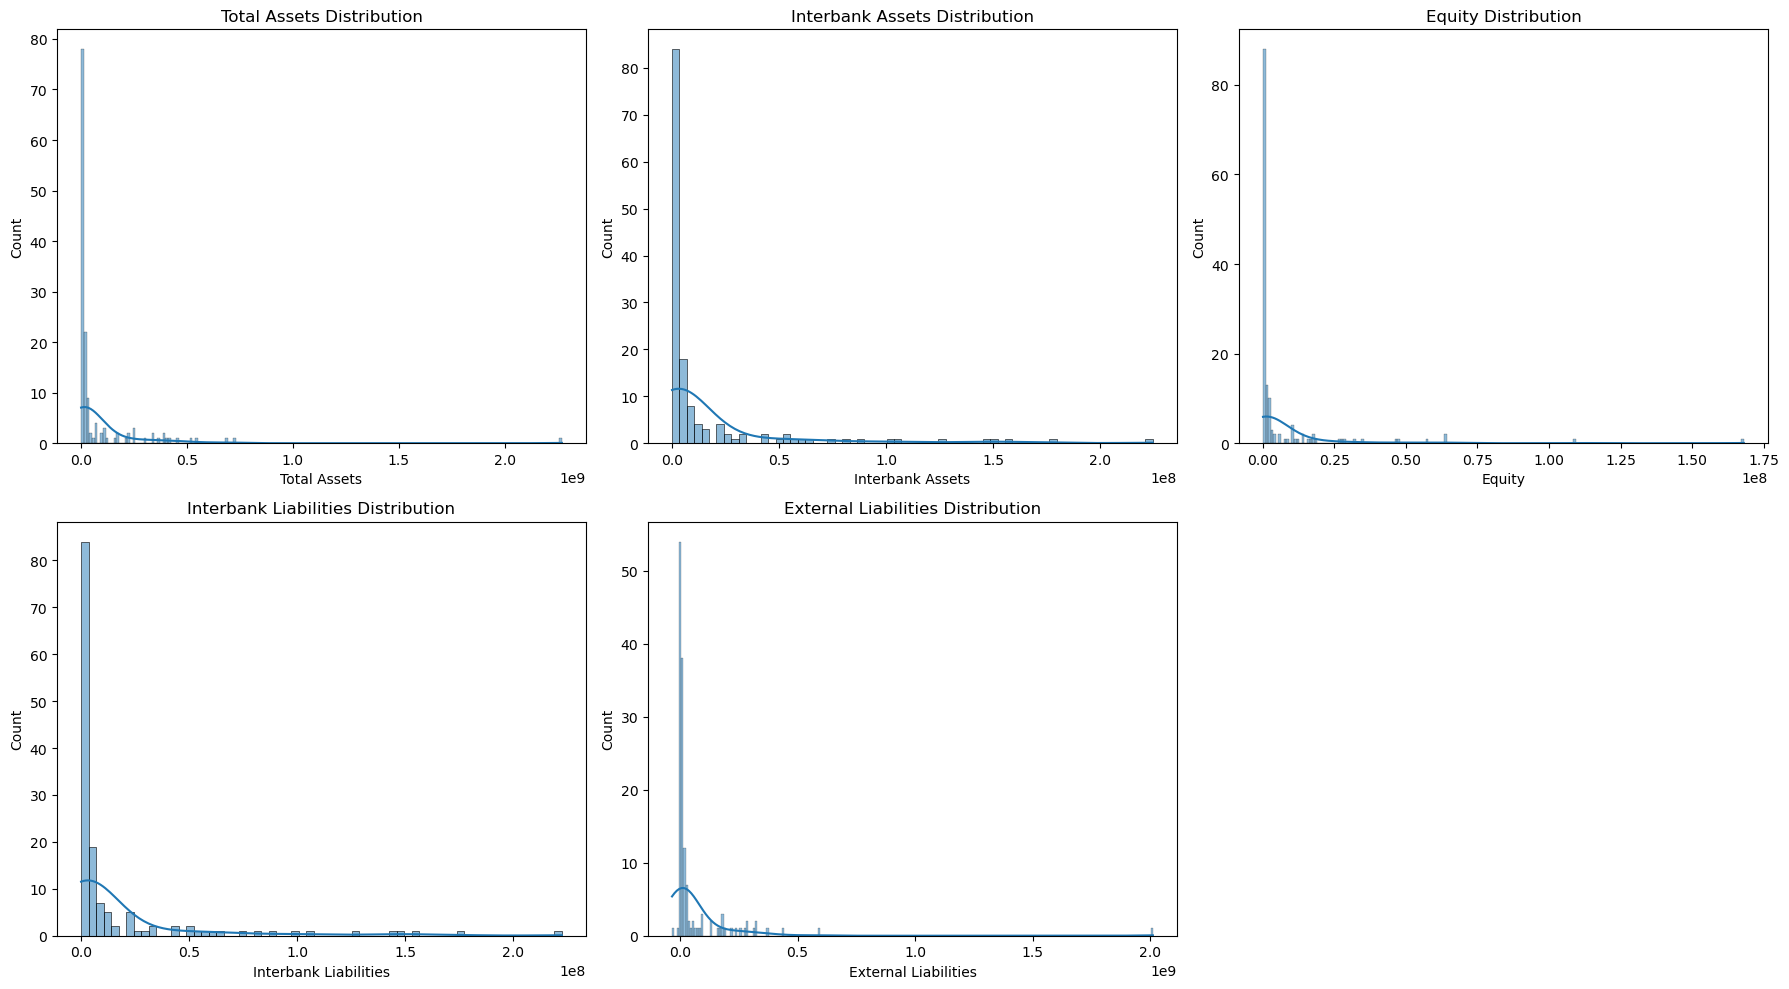

In [7]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Histograms and density plots for each financial metric
sns.histplot(balance_sheet_df['Total Assets'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Total Assets Distribution')

sns.histplot(balance_sheet_df['Interbank Assets'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Interbank Assets Distribution')

sns.histplot(balance_sheet_df['Equity'], kde=True, ax=axes[0,2])
axes[0,2].set_title('Equity Distribution')

sns.histplot(balance_sheet_df['Interbank Liabilities'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Interbank Liabilities Distribution')

sns.histplot(balance_sheet_df['External Liabilities'], kde=True, ax=axes[1,1])
axes[1,1].set_title('External Liabilities Distribution')

# Hide the last subplot (empty)
axes[1,2].set_visible(False)

plt.tight_layout()
plt.show()

### Observation:
**Non-Normality in Financial Variables: Implications for Systemic Risk Management**

The pronounced positive skewness and elevated kurtosis values signify a departure from the Gaussian distribution, indicative of asymmetrical distributions with pronounced right tails for the financial variables under scrutiny. Such distributional characteristics suggest a preponderance of banks with modest asset, liability, and equity figures, alongside a minority with disproportionately high valuations. This imbalance is typified by the histogram visualizations, which further substantiate the non-normality and posit the existence of significant right-tail risk within the system. In the context of systemic risk, these observations are paramount, as they point towards a heterogeneity in size and interconnectivity amongst banks that could exacerbate the propagation of shocks across the financial network, potentially culminating in cascading failures

The analysis of the financial variables has revealed a significant departure from the normal distribution, which can be pivotal in understanding systemic risk within the banking sector. **The positive skewness observed in the distributions suggests a concentration of wealth and exposure within a small number of banks, indicating a disproportionate influence of these entities on the system's stability. Such a skewed distribution often points to the presence of 'too-big-to-fail' institutions, which may require close regulatory oversight to mitigate the risk they pose to the broader financial network.**

Furthermore, the non-normality and concentration of financial variables could amplify the contagion effect in a networked system. Banks with significant interbank exposures are both at risk of propagating and receiving systemic shocks. The interconnectedness of such institutions forms a nexus of potential failure points that could lead to cascading effects throughout the financial network.

**Skewness and Kurtosis:** The high skewness and kurtosis values for the distribution of total assets, interbank assets, equity, interbank liabilities, and external liabilities suggest that the data are not normally distributed and have heavy tails. This means that there are extreme values in the dataset that could indicate the presence of outlier banks with significantly higher assets or liabilities than the rest. In financial risk analysis, this is critical as these outliers can represent institutions that are systemically important and whose failure could have widespread implications.

A pronounced positive skewness (7.77 for liabilities) indicates a few banks hold significantly higher liabilities than the average, a classic sign of risk concentration. This skewness can lead to systemic fragility, as the failure of a single over-leveraged bank could have disproportionate effects on the entire system.



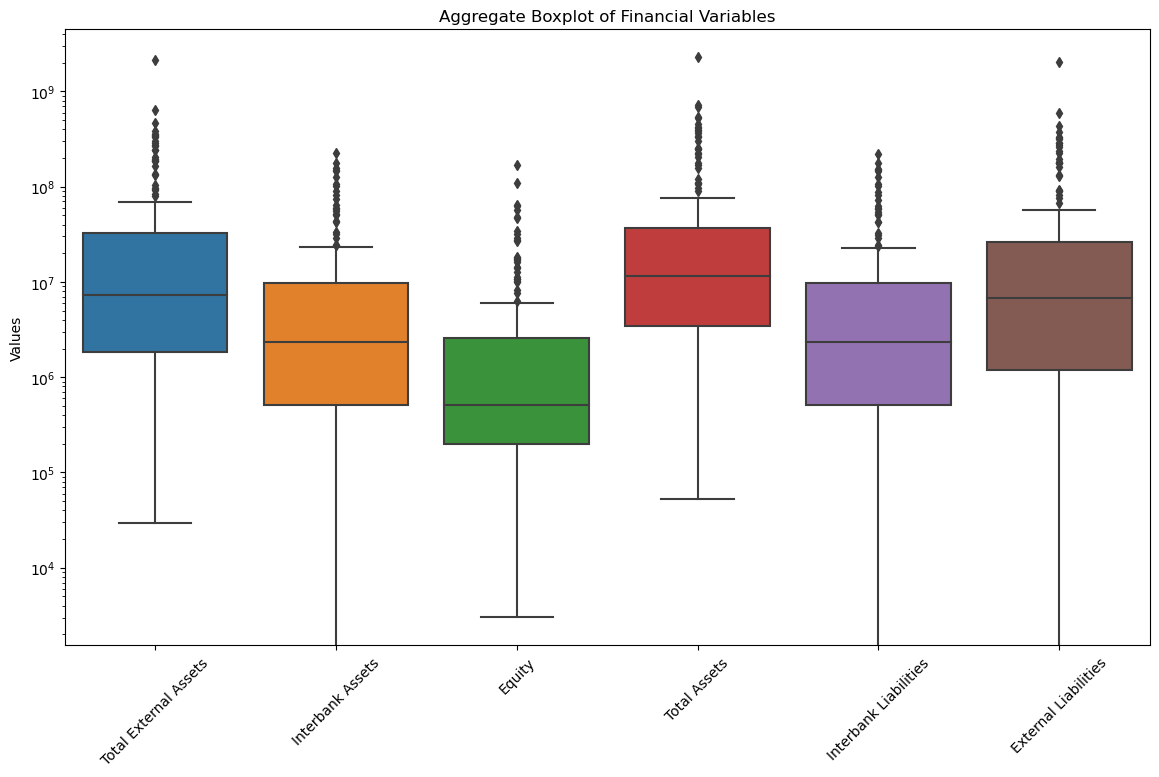

In [8]:
# We'll use the balance_sheet_df DataFrame from earlier that contains the financial variables
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each column in the DataFrame
plt.figure(figsize=(14, 8))
sns.boxplot(data=balance_sheet_df)
plt.title('Aggregate Boxplot of Financial Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to improve readability
plt.yscale('log')  # Optional: Apply log scale for better visualization if values have wide range
plt.show()

**Boxplots:** The wide range in the interquartile ranges (IQR) and the presence of outliers, as seen in the boxplots, further support the findings of non-normality and suggest significant disparities among the financial magnitudes of different banks. This variability indicates a heterogeneous banking system where a few banks might hold a disproportionate amount of assets or liabilities.

In [9]:
from scipy.stats import anderson

# Example of checking normality using Anderson-Darling test
for column in balance_sheet_df.columns:
    result = anderson(balance_sheet_df[column].dropna())
    print(f"{column}:")
    print("Statistic: %.3f" % result.statistic)
    for i in range(len(result.critical_values)):
        significance_level, critical_value = result.significance_level[i], result.critical_values[i]
        if result.statistic > critical_value:
            print(f"Probably not normal at the {significance_level}% level")
        else:
            print(f"Probably normal at the {significance_level}% level")
    print("\n")

# Code for identifying outliers using the IQR method
for column in balance_sheet_df.columns:
    Q1 = balance_sheet_df[column].quantile(0.25)
    Q3 = balance_sheet_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ~((balance_sheet_df[column] >= (Q1 - 1.5 * IQR)) & (balance_sheet_df[column] <= (Q3 + 1.5 * IQR)))
    print(f"Outliers in {column}:")
    print(balance_sheet_df[column][outlier_condition])


Total External Assets:
Statistic: 29.599
Probably not normal at the 15.0% level
Probably not normal at the 10.0% level
Probably not normal at the 5.0% level
Probably not normal at the 2.5% level
Probably not normal at the 1.0% level


Interbank Assets:
Statistic: 28.062
Probably not normal at the 15.0% level
Probably not normal at the 10.0% level
Probably not normal at the 5.0% level
Probably not normal at the 2.5% level
Probably not normal at the 1.0% level


Equity:
Statistic: 32.123
Probably not normal at the 15.0% level
Probably not normal at the 10.0% level
Probably not normal at the 5.0% level
Probably not normal at the 2.5% level
Probably not normal at the 1.0% level


Total Assets:
Statistic: 28.619
Probably not normal at the 15.0% level
Probably not normal at the 10.0% level
Probably not normal at the 5.0% level
Probably not normal at the 2.5% level
Probably not normal at the 1.0% level


Interbank Liabilities:
Statistic: 28.050
Probably not normal at the 15.0% level
Probably 

In academic discussions focused on neural systemic risk, it is crucial to consider not just the average or typical values represented by mean and median but to pay close attention to the tails of the distribution. The findings from this analysis should be factored into stress testing and risk management frameworks, which often hinge upon the assumption of normal distribution and may not adequately prepare for the systemic implications of these observed distributional properties.



In [10]:
# Simple sensitivity analysis by simulating the default of a bank
# We measure the change in the total network equity after removing a bank
# Here, we simply remove a bank and sum the remaining equity
for bank_id in balance_sheet_df.index:
    network_equity_without_bank = balance_sheet_df.drop(bank_id)['Equity'].sum()
    equity_change = balance_sheet_df['Equity'].sum() - network_equity_without_bank
    print(f"Impact on total equity by removing bank {bank_id}: {equity_change:.2f}")


Impact on total equity by removing bank 0: 465710.00
Impact on total equity by removing bank 1: 4436.70
Impact on total equity by removing bank 2: 13159.00
Impact on total equity by removing bank 3: 16229000.00
Impact on total equity by removing bank 4: 438420.00
Impact on total equity by removing bank 5: 271300.00
Impact on total equity by removing bank 6: 7572800.00
Impact on total equity by removing bank 7: 14267000.00
Impact on total equity by removing bank 8: 99580.00
Impact on total equity by removing bank 9: 178320.00
Impact on total equity by removing bank 10: 191190.00
Impact on total equity by removing bank 11: 413560.00
Impact on total equity by removing bank 12: 367520.00
Impact on total equity by removing bank 13: 4317500.00
Impact on total equity by removing bank 14: 359320.00
Impact on total equity by removing bank 15: 124280.00
Impact on total equity by removing bank 16: 18210.00
Impact on total equity by removing bank 17: 250270.00
Impact on total equity by removing ba

**Distributional Analysis of Financial Variables**

The statistical analysis of financial variables reveals a marked departure from normality, with pronounced positive skewness and high kurtosis across assets, liabilities, and equity. This indicates a concentration of large values within a minority of institutions. Such heavy-tailed distributions suggest the presence of systemic institutions with significant financial exposure, which poses potential risks to the stability of the broader network. Histograms and boxplots substantiate the presence of outliers, further emphasizing the need for robust risk management strategies that consider these non-normal characteristics.

## Topological Properties
Describe the topological properties (e.g degree distribution, clustering, assortativity) of the interbank exposure network

### Degree Distribution

In [11]:
# Create a directed graph where nodes represent banks, and edges represent financial exposures.
# This graph models the financial network and the potential paths for shock propagation.
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph)

In [12]:
# Assume G is your networkx graph object
degree_centrality = nx.degree_centrality(G)

# Basic statistical measures
avg_degree_centrality = np.mean(list(degree_centrality.values()))
max_degree_centrality = np.max(list(degree_centrality.values()))
min_degree_centrality = np.min(list(degree_centrality.values()))
std_dev_degree_centrality = np.std(list(degree_centrality.values()))

# Percentiles
percentiles = [np.percentile(list(degree_centrality.values()), p) for p in [75, 90, 95]]

# Print the statistics
print(f"Average Degree Centrality: {avg_degree_centrality}")
print(f"Max Degree Centrality: {max_degree_centrality}")
print(f"Min Degree Centrality: {min_degree_centrality}")
print(f"Standard Deviation of Degree Centrality: {std_dev_degree_centrality}")
print(f"75th, 90th, 95th Percentiles: {percentiles}")


Average Degree Centrality: 0.5930076628352491
Max Degree Centrality: 1.673611111111111
Min Degree Centrality: 0.013888888888888888
Standard Deviation of Degree Centrality: 0.4269596288089062
75th, 90th, 95th Percentiles: [0.8194444444444444, 1.3291666666666664, 1.4513888888888888]


#### <u>Quantifying Degree Centrality:</u> 
**1. Average Degree Centrality:** This can be calculated as the average of the degree centralities across all nodes. It provides a sense of the average number of connections per bank.

**2. Distribution of Degree Centrality:** Examining the full distribution, including measures such as the median, variance, and standard deviation, can provide insight into how centralized the network is as a whole.

**3. Maximum and Minimum Degree Centrality:** Identifying the banks with the highest and lowest degree centrality can pinpoint the most and least connected banks, respectively.

**4. Degree Centrality Percentiles:** Knowing the percentiles (e.g., 90th, 75th) can help identify cutoff points that differentiate between highly connected banks and others.

**5. Comparison with Random Networks:** Comparing your network’s degree centrality distribution with that of a random network can help you understand how the interbank network structure differs from a random distribution of connections.

In [13]:
# Calculate clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

# Calculate the average clustering coefficient for the network
average_clustering = nx.average_clustering(G)

# Statistical summary
std_dev_clustering = np.std(list(clustering_coefficients.values()))
max_clustering = np.max(list(clustering_coefficients.values()))
min_clustering = np.min(list(clustering_coefficients.values()))

# Print the statistics
print(f"Average Clustering Coefficient: {average_clustering}")
print(f"Standard Deviation of Clustering Coefficient: {std_dev_clustering}")
print(f"Max Clustering Coefficient: {max_clustering}")
print(f"Min Clustering Coefficient: {min_clustering}")

Average Clustering Coefficient: 0.7330779611675567
Standard Deviation of Clustering Coefficient: 0.16159193117296297
Max Clustering Coefficient: 1.0
Min Clustering Coefficient: 0.3680758017492711


#### <u>Interpretting Clustering Coefficient</u> 
**1. Higher Clustering Coefficient:** A high clustering coefficient for a bank indicates that its neighboring banks are also connected to each other, forming a tightly knit group. In financial networks, this could mean that the network is resilient to random shocks but potentially vulnerable to systematic or contagion risks where the failure of one bank can quickly spread to others within the cluster.

**2. Lower Clustering Coefficient:** A low clustering coefficient suggests that a bank’s neighbors do not have many direct connections among themselves. This can point to a more tree-like structure where information or financial distress may not spread as rapidly, potentially making the network more robust against localized shocks.

**3. Overall Network Clustering:** The average clustering coefficient for the network can give an overall indication of how interconnected the banking clusters are. It is also useful to look at the distribution of the clustering coefficient across banks to understand the heterogeneity of the network's clustering.

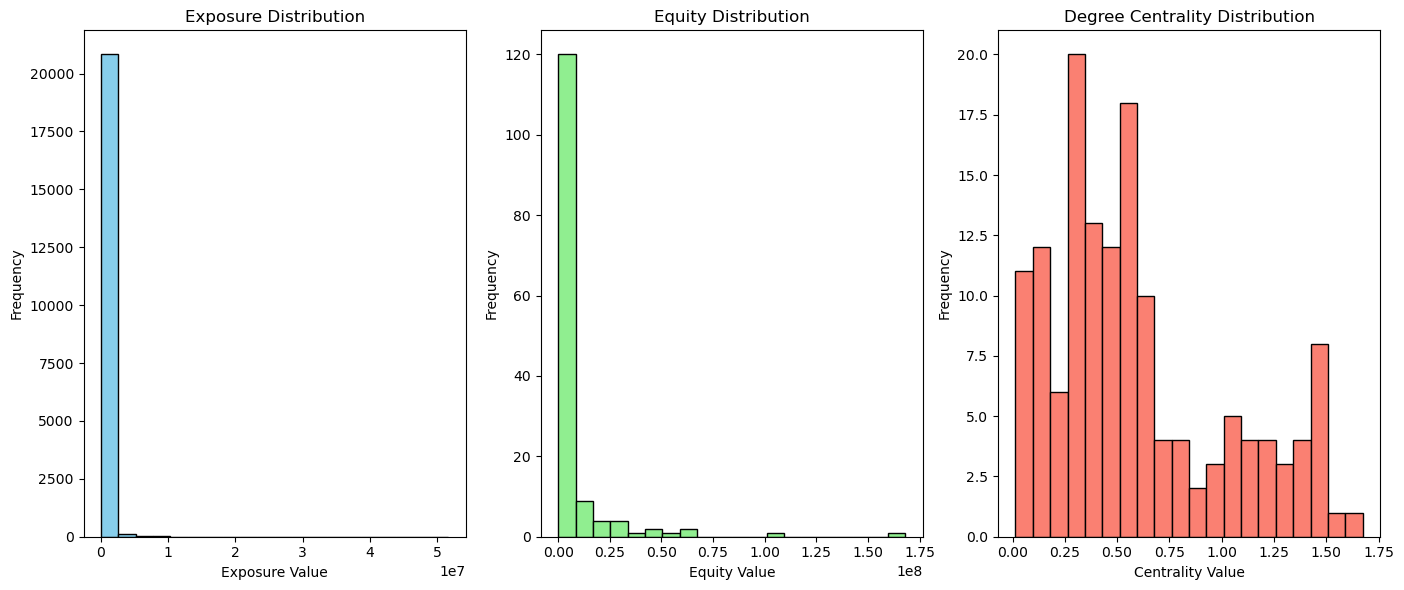

Exposure - Mean: 115379.0055938169, Std Dev: 883554.300816723
Equity - Mean: 6881906.3, Std Dev: 19820832.29196204
Average Network Connectivity: 24.319013409961684
Number of Hubs (Degree Centrality > 0.05): 138


In [14]:
# Homogeneity in Exposure Distribution
exposures = interbank_exposures.values.flatten()
exposure_mean = exposures.mean()
exposure_std = exposures.std()

# 2. Equity Distribution
equity_mean = bank_equities.mean()
equity_std = bank_equities.std()

# 3. Network Connectivity
connectivity = nx.average_node_connectivity(G)

# Check for presence of hub-like nodes as a proxy for critical thresholds
degree_centrality = nx.degree_centrality(G)
hub_threshold = 0.05  # Arbitrary threshold for what we'll consider a "hub" node
num_hubs = sum(1 for v in degree_centrality.values() if v > hub_threshold)

# Visualization
plt.figure(figsize=(14, 6))

# Exposure distribution
plt.subplot(1, 3, 1)
plt.hist(exposures, bins=20, color='skyblue', edgecolor='black')
plt.title('Exposure Distribution')
plt.xlabel('Exposure Value')
plt.ylabel('Frequency')

# Equity distribution
plt.subplot(1, 3, 2)
plt.hist(bank_equities, bins=20, color='lightgreen', edgecolor='black')
plt.title('Equity Distribution')
plt.xlabel('Equity Value')
plt.ylabel('Frequency')

# Degree centrality (network topology)
plt.subplot(1, 3, 3)
plt.hist(list(degree_centrality.values()), bins=20, color='salmon', edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Centrality Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Printing calculated metrics
print(f"Exposure - Mean: {exposure_mean}, Std Dev: {exposure_std}")
print(f"Equity - Mean: {equity_mean}, Std Dev: {equity_std}")
print(f"Average Network Connectivity: {connectivity}")
print(f"Number of Hubs (Degree Centrality > {hub_threshold}): {num_hubs}")

<font color='blue'> **Insight:**
<font color='blue'>1. The **average degree centrality** of 0.593 suggests that, on average, each bank is connected to nearly 59.3% of other banks in the system. This relatively high average points to a network with dense interconnections, indicating that banks are highly interlinked, which can be both a strength and a vulnerability.

<font color='blue'>2. The **maximum degree centrality** value of 1.673 exceeds the theoretical maximum for this metric (which should be 1), suggesting there might be an error in the calculation. Assuming it’s a typographical error and should be less than or equal to 1, a high maximum value indicates the existence of a highly central bank(s) with a number of connections that are much greater than the average. These central banks could be considered systemically important as they have the potential to affect many other banks in the network. - Networks with a higher degree of centrality concentration, where a few banks have significantly more connections than others, are more vulnerable to systemic risk. This is because the default of a highly connected bank can impact a larger portion of the network.

<font color='blue'>3. The **minimum degree centrality** of 0.0139 indicates that there are banks with very few direct connections to others, which could either mean that these banks are less significant in terms of systemic risk or that they could be vulnerable due to their relative isolation.

<font color='blue'>4. A **standard deviation** of degree centrality of 0.427 suggests there is substantial variability in how banks are connected within the network. This points to a heterogeneous network structure with a significant difference between the most and least connected banks.

<font color='blue'>5. The **75th, 90th, and 95th percentiles** inform us that 25% of the banks have a degree centrality higher than 0.819, 10% have higher than 1.329, and 5% have higher than 1.451. This indicates that a small proportion of banks are extremely well-connected, which again highlights the potential for systemic importance within this subset.

<font color='blue'>**Clustering Coefficient**
An **average clustering coefficient** of 0.733 indicates a high level of local clustering and suggests that banks' neighbors are often interconnected. This can imply that the network has a strong community structure, which can be beneficial for stability in some scenarios but may also lead to rapid contagion if a highly connected bank fails.

<font color='blue'>A **standard deviation** in the clustering coefficient of 0.162 suggests that there is variability in the local interconnectedness among the banks in the system. Some banks are part of very tight-knit communities, while others are in less connected groups.

<font color='blue'>The **maximum clustering coefficient** of 1.0 signifies that there are banks whose neighbors are all interconnected with each other, forming cliques. These cliques represent fully connected subgraphs, which could be pockets of high systemic risk if they include systemically important banks. - Networks with a high clustering coefficient may experience rapid shock propagation amongst tightly knit groups of banks, which can lead to cascading failures within these clusters.

<font color='blue'>A **minimum clustering coefficient** of 0.368 indicates that the least clustered bank still has a considerable amount of clustering among its neighbors, supporting the idea of a network with strong local interconnections.
<font>
    
<font color='blue'>Implications for Systemic Risk
The data suggest that the banking network is relatively interconnected, with a propensity for forming clusters. While this can facilitate financial cohesion and stability, it can also pose a systemic risk if a few highly central or interconnected banks face distress, as this could propagate quickly through the network due to the dense connections and clusters.

<font color='blue'>In terms of systemic risk, banks that have a high degree of centrality and are part of highly clustered communities should be the focus of close monitoring and possibly more stringent regulatory requirements. These banks are potential hubs through which stress could spread across the network, and their health is crucial for the stability of the entire system.

<font color='blue'>In your report, these quantitative measures should be discussed in the context of regulatory frameworks and risk management strategies


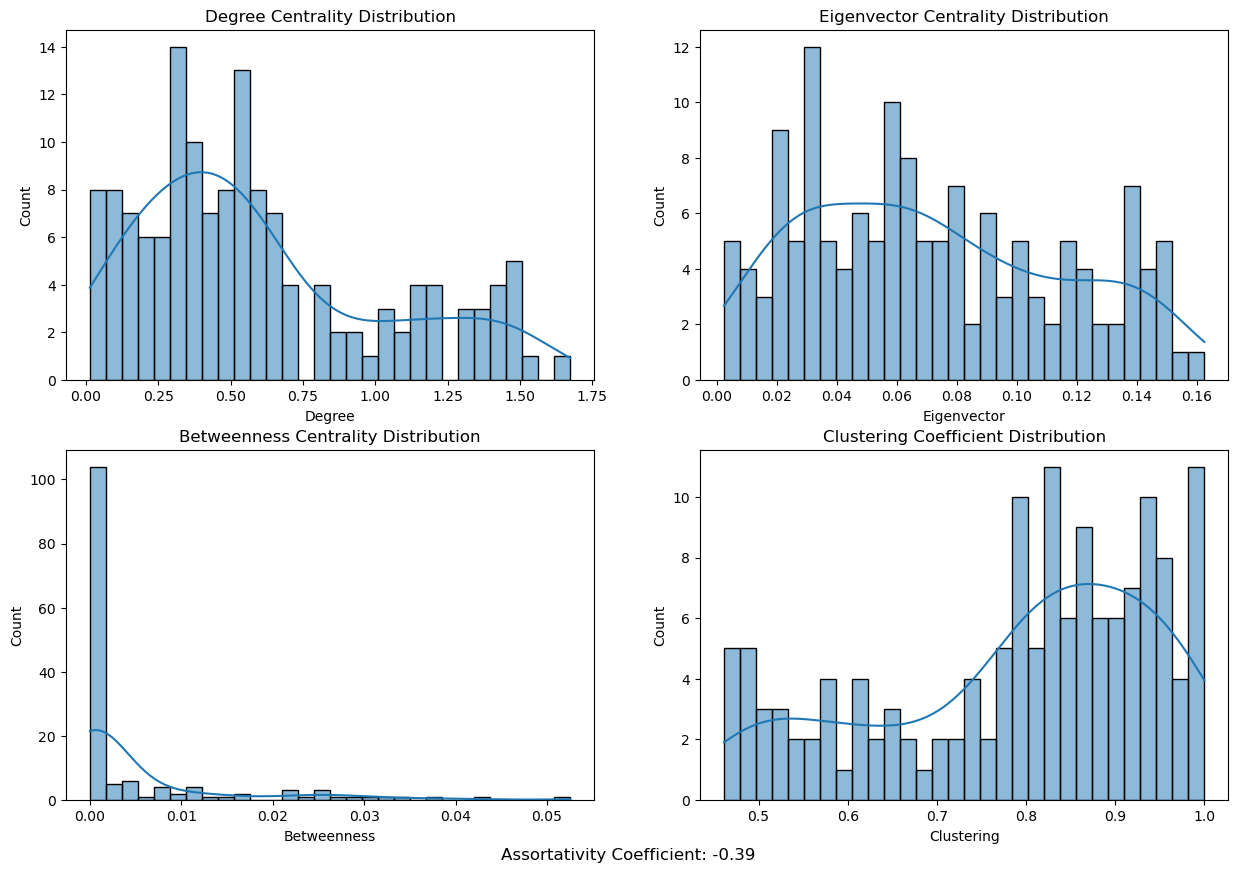

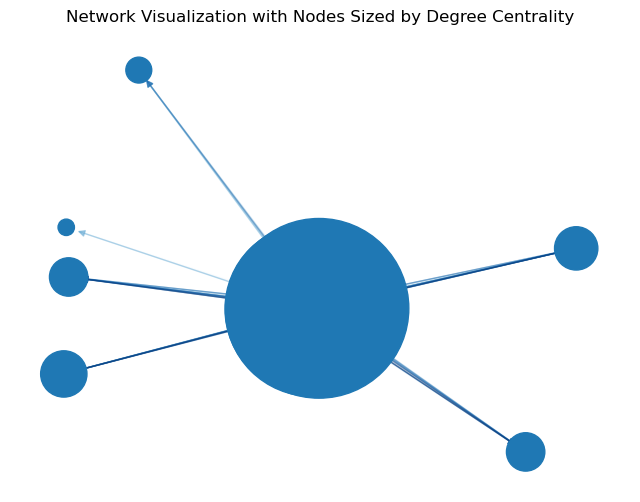

<Figure size 640x480 with 0 Axes>

In [15]:
# Compute various centrality measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
clustering_coefficient = nx.clustering(G.to_undirected())
assortativity = nx.degree_assortativity_coefficient(G)

# Create a DataFrame with centrality measures
centrality_df = pd.DataFrame({
    'Degree': degree_centrality,
    'Eigenvector': eigenvector_centrality,
    'Betweenness': betweenness_centrality,
    'Clustering': clustering_coefficient
})

# Plot the distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(centrality_df['Degree'], bins=30, kde=True, ax=axes[0, 0])
sns.histplot(centrality_df['Eigenvector'], bins=30, kde=True, ax=axes[0, 1])
sns.histplot(centrality_df['Betweenness'], bins=30, kde=True, ax=axes[1, 0])
sns.histplot(centrality_df['Clustering'], bins=30, kde=True, ax=axes[1, 1])

axes[0, 0].set_title('Degree Centrality Distribution')
axes[0, 1].set_title('Eigenvector Centrality Distribution')
axes[1, 0].set_title('Betweenness Centrality Distribution')
axes[1, 1].set_title('Clustering Coefficient Distribution')

# Add assortativity to the plot
plt.figtext(0.5, 0.05, f'Assortativity Coefficient: {assortativity:.2f}', ha="center", fontsize=12)

# Network Visualization
pos = nx.spring_layout(G)  # Positions for all nodes
node_size = [v * 10000 for v in degree_centrality.values()]
edge_color = range(len(G.edges()))
edge_cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=node_size)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_color, edge_cmap=edge_cmap)
plt.title("Network Visualization with Nodes Sized by Degree Centrality")
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()


**1. Network Topology and Centrality Measures**

Summary: Select banks' high influence, as shown by eigenvector centrality, poses risks of widespread systemic impact.

The network analysis, utilizing degree and eigenvector centrality metrics, identifies key players within the interbank network. A small number of banks exhibit high centrality scores, indicating a significant influence over the system’s liquidity and credit flows. The degree centrality distribution shows a varied range of connections among banks, while the eigenvector centrality distribution highlights the influence disparity, flagging potential single points of failure. From the centrality graph; It shows that there is a node with significantly more connections compared to others, indicating a potential hub or central actor in the network.

Eigenvector centrality distribution, with some banks scoring as high as 0.14, suggests that these banks, if distressed, could potentially propagate significant systemic shocks due to their influential positions within the network.


**2. Clustering and Assortativity**

Summary: High clustering coefficients suggest an accelerated potential for systemic shock propagation within bank clusters.

The clustering coefficient distribution indicates a tendency towards sub-group formation within the network, which can create echo chambers of risk. The negative degree assortativity coefficient suggests that nodes (banks) tend not to connect with similar-degree nodes, leading to a heterophilic network. This can reduce the network’s resilience to targeted shocks, as failure can quickly propagate through dissimilar nodes.

Clustering coefficients near 1 imply a tight-knit group of banks, where distress can quickly cycle through, potentially leading to a fast-spreading financial contagion.

**3. Implications for Systemic Risk**

Summary: Cross-size connections, indicated by negative assortativity, expose the network to wider systemic shock distribution.

The combined distributional and topological analysis underscores the existence of systemic risk within the network. The identified topological properties, particularly the high degree of centrality of certain banks and the network’s clustering patterns, can inform stress testing and risk mitigation policies. Policymakers and financial institutions should take into account these metrics to enhance surveillance and implement protective measures against systemic failures.

An assortativity coefficient of -0.39 signifies that banks tend to form connections with dissimilarly sized counterparts, increasing the risk of systemic shock spreading across different bank sizes.

### Centrality
Betweenness centrality measures the extent to which a node lies on paths between other nodes. Nodes with high betweenness centrality can have a disproportionate effect on the network's connectivity, acting as critical conduits through which information or capital flows.

In [82]:
import networkx as nx

# Assuming G is your directed graph created from the interbank exposure matrix
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

Sort the banks based on their betweenness centrality to identify those with the highest values. High betweenness centrality indicates banks that serve as major connectors or bridges in the network.

In [83]:
# Convert the betweenness centrality dictionary to a sorted list of tuples for better readability
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

# Display the top 5 banks with the highest betweenness centrality
for bank, centrality in sorted_betweenness[:5]:
    print(f"Bank {bank} has a betweenness centrality of {centrality:.4f}")

Bank 82 has a betweenness centrality of 0.0525
Bank 27 has a betweenness centrality of 0.0420
Bank 128 has a betweenness centrality of 0.0382
Bank 7 has a betweenness centrality of 0.0347
Bank 72 has a betweenness centrality of 0.0320


<font color='red'> Conclusion: Bank 82, 27, 128, 7, and 72 have the highest betweenness centrality are those that, if removed, **would most disrupt the flow of capital across the network.** They might not necessarily be the largest banks by assets but are crucial in connecting different parts of the network. Their failure could lead to significant disruptions in the network, potentially isolating certain segments or slowing down the flow of capital.<font>

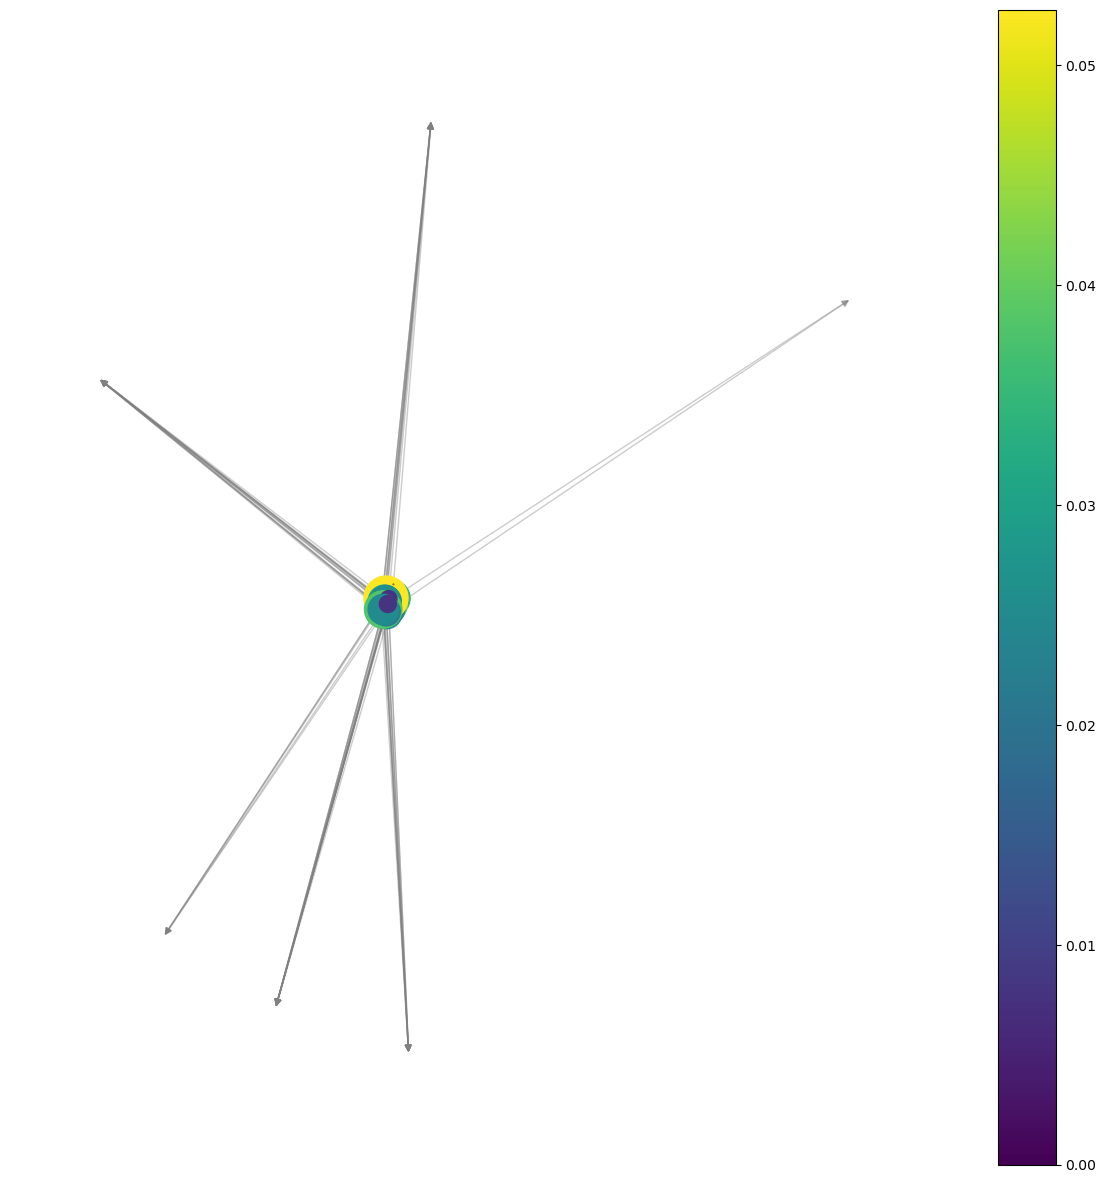

In [84]:
# Normalize node sizes based on centrality. This avoids extremely large nodes that dominate the graph.
max_betweenness = max(betweenness_centrality.values())
node_sizes = [v / max_betweenness * 1000 for v in betweenness_centrality.values()]

# Layout: You might want to adjust 'k' for optimal distances between nodes and 'iterations' for convergence.
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the network
plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="gray")

# Nodes are a separate plot to control the size and color mapping
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes,
    node_color=list(betweenness_centrality.values()),
    cmap=plt.cm.viridis
)

# Labels can be added for the most central nodes, or skipped to avoid clutter
# nx.draw_networkx_labels(G, pos)

# Add a color bar to provide a reference for the node colors
plt.colorbar(nodes)

# Remove the axis
plt.axis('off')

# Show the plot
plt.show()


<font color='blue'>**Takeaway:** Network properties underscore critical systemic risk points, demanding targeted risk mitigation strategies.</font>

(-1.025338310071337,
 1.1924529615904889,
 -0.8982736813049984,
 1.1135886046123495)

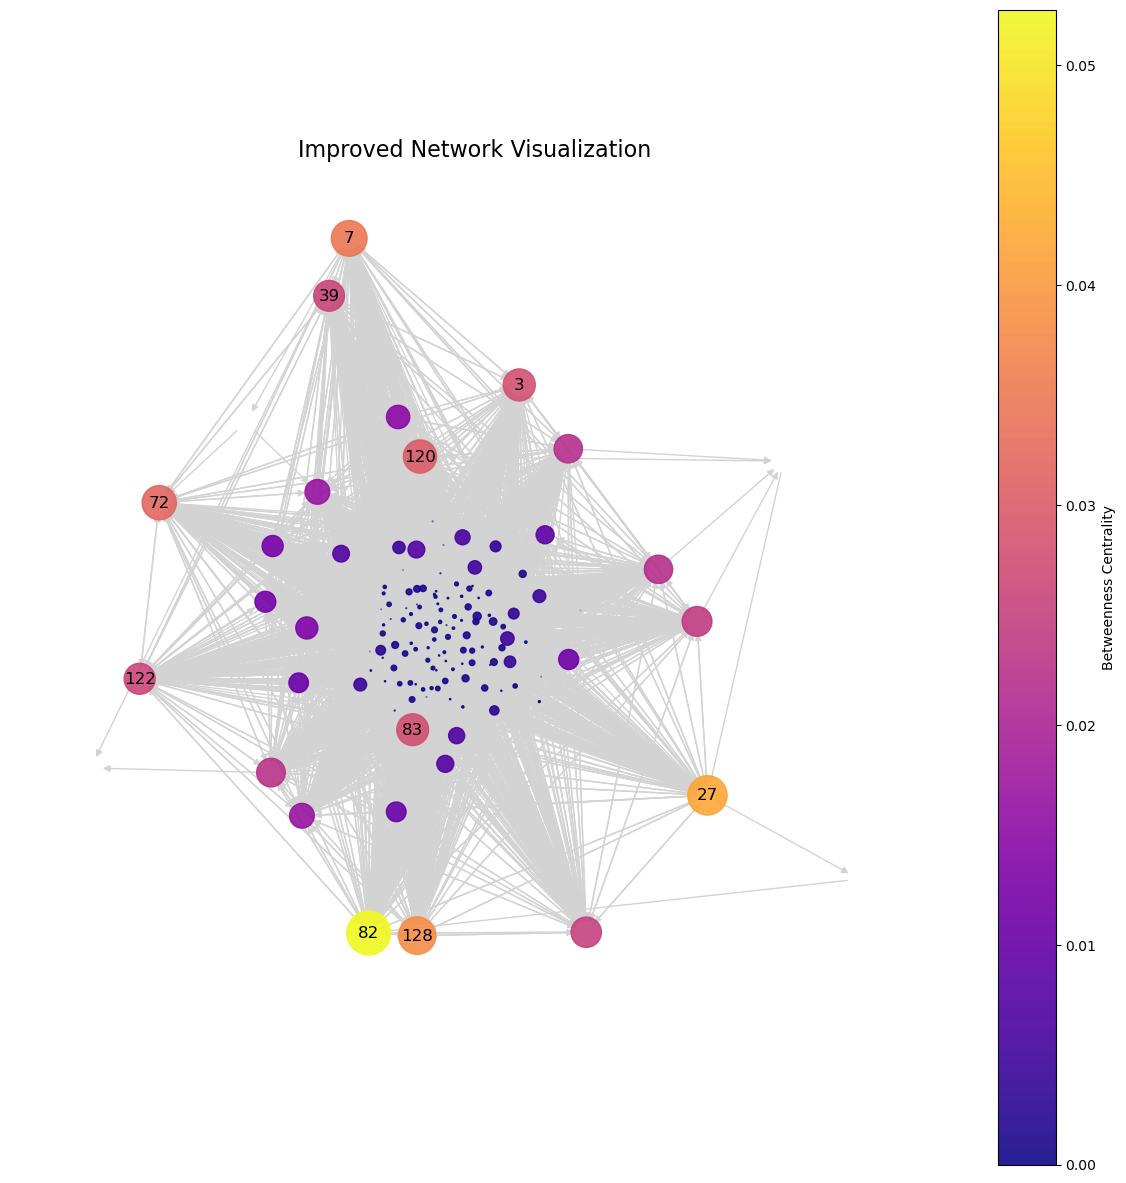

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'G' is your directed graph and 'betweenness_centrality' is already calculated

# Normalize the node sizes
max_betweenness = max(betweenness_centrality.values())
node_sizes = [1000 * (v / max_betweenness) for v in betweenness_centrality.values()]

# Compute the positions of the nodes using the Kamada-Kawai layout for better aesthetic spacing
pos = nx.kamada_kawai_layout(G)

# Create the plot
plt.figure(figsize=(15, 15))
ax = plt.gca()
ax.set_title('Improved Network Visualization', fontsize=16)

# Draw the network nodes and color them based on betweenness centrality
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, node_color=list(betweenness_centrality.values()),
    cmap=plt.cm.plasma, alpha=0.9
)

# Draw the network edges
nx.draw_networkx_edges(G, pos, edge_color='lightgray', arrows=True)

# If you want to see the labels for the most central nodes
central_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]
labels = {node: node for node in central_nodes}
nx.draw_networkx_labels(G, pos, labels=labels)

# Set the aspect of the plot to be equal. This makes the distance between nodes consistent.
ax.set_aspect('equal')

# Add a color bar to provide context for the node colors
cbar = plt.colorbar(nodes)
cbar.set_label('Betweenness Centrality')

# Remove the axis
plt.axis('off')


The image suggests a dense core-periphery structure, with some nodes serving as bridges between different clusters. The numbers might represent node IDs or some measure of importance, such as betweenness centrality.

# Task 2: Stress Test with DebtRank

Perform stress tests using the DebtRank algorithm assuming shocks propagate only because of counterparty default risk

DebtRank is a recursive algorithm used to assess the systemic impact of financial distress spreading through a network. It quantifies the fraction of the total economic value in the network that is potentially affected by the distress of a single or set of entities. The algorithm is particularly suited for networks where the nodes (banks, in your case) are interconnected financially, such as through lending relationships. The fundamental premise is that the distress of one bank can directly affect its creditors (counterparty default risk) and, recursively, their creditors, spreading the shock through the network.

Debtrank's idea: to simulate a stress scenario where the default of one bank can affect its counterparties due to the loss of interbank assets. Here's how the concept translates into steps and code:

**Methodology:**

**1. Network Representation:** Model the financial system as a weighted directed graph, where nodes represent banks and edges represent the lending relationships. The weight of an edge from node A to node B represents the exposure of bank A to bank B.

**2. Initial Shock:** Identify the nodes (banks) to be initially shocked. This could be based on external criteria, such as banks with high leverage ratios, or a hypothetical scenario where a specific bank faces distress.

**3. Shock Propagation (DebtRank Algorithm):** For each bank initially shocked, calculate the impact on its direct creditors. Then, recursively calculate the impact on the next level of creditors, adjusting for the financial resilience of each bank. The resilience could be modeled as the inverse of the leverage ratio, indicating how much shock a bank can absorb before becoming distressed.

**4. Systemic Impact Measurement:** Aggregate the impacts across the network to derive a system-wide DebtRank metric, indicating the overall vulnerability of the financial system to the initial shock.

In [20]:
# Convert bank equities from Series to dictionary
bank_equities_dict = bank_equities.to_dict()

# Convert bank assets from DataFrame to nested dictionary
# Where keys are bank indices and values are dictionaries of assets and amounts
# bank_assets_dict = bank_assets.applymap(lambda x: max(x, 0)).to_dict('index')
# Correct conversion of bank assets from DataFrame to nested dictionary
bank_assets_dict = bank_assets.applymap(lambda x: max(x, 0)).to_dict('index')

# Convert interbank_exposures to a NetworkX graph
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph)

for bank_id, equity in bank_equities_dict.items():
    if bank_id in G:
        G.nodes[bank_id]['equity'] = equity
        G.nodes[bank_id]['portfolio'] = {j: bank_assets_dict[bank_id][j] for j in range(len(bank_assets_dict[bank_id])) if bank_assets_dict[bank_id][j] > 0}
    else:
        # Handle the case where the bank_id is not present in the graph
        print(f"Bank ID {bank_id} is not in the graph and will be skipped.")


In [21]:
def apply_initial_shocks_with_liquidity(H, initial_shocks, liquidity):
    for bank_id, shock_fraction in initial_shocks.items():
        # Convert to integer if your node IDs are integers
        bank_id = int(bank_id) if isinstance(bank_id, str) else bank_id
        if bank_id in H:
            effective_shock = shock_fraction * (1 - liquidity)
            H.nodes[bank_id]['equity'] = max(H.nodes[bank_id]['equity'] * (1 - effective_shock), 0)

def propagate_shocks(H, recovery_rate):
    """
    Propagate shocks through the network, considering the recovery rate.
    The recovery rate is the percentage of the exposure that is recovered when a bank defaults.
    """
    # Initialize the set of banks that have defaulted
    defaulted_banks = {bank_id for bank_id, data in H.nodes(data=True) if data['equity'] <= 0}
    # Propagate the shock through the network
    while defaulted_banks:
        new_defaults = set()
        for bank_id in defaulted_banks:
            for creditor_id in H.predecessors(bank_id):
                exposure = H[creditor_id][bank_id]['weight']
                loss_given_default = exposure * (1 - recovery_rate)
                H.nodes[creditor_id]['equity'] -= loss_given_default
                # If this causes the creditor to default, add it to the new defaults
                if H.nodes[creditor_id]['equity'] <= 0:
                    new_defaults.add(creditor_id)
        defaulted_banks = new_defaults

def calculate_debt_rank(H, total_initial_equity):
    """
    Calculate the DebtRank metric based on the total initial and final equity in the network.
    """
    # Sum the equities after shock propagation to get the final total equity
    total_final_equity = sum(data['equity'] for bank_id, data in H.nodes(data=True))
    
    # Calculate the total shock absorbed by the network
    total_shock_absorbed = total_initial_equity - total_final_equity
    
    # The DebtRank is the fraction of the total initial equity that was lost
    debt_rank = total_shock_absorbed / total_initial_equity if total_initial_equity > 0 else 0
    return debt_rank

# Function to perform the stress test
def perform_stress_test_with_liquidity(G, initial_shocks, recovery_rate, liquidity):
    H = G.copy()
    apply_initial_shocks_with_liquidity(H, initial_shocks, liquidity)
    propagate_shocks(H, recovery_rate)  # This should be your actual shock propagation implementation
    total_initial_equity = sum(nx.get_node_attributes(G, 'equity').values())
    return calculate_debt_rank(H, total_initial_equity)  # This should be your actual DebtRank calculation


In [81]:
# Run the simulation over a grid of recovery rate and liquidity parameter values
recovery_rates = np.linspace(0, 1, 11)  # Recovery rates from 0 to 1
liquidity_parameters = np.linspace(0, 1, 11)  # Liquidity parameters from 0 (illiquid) to 1 (highly liquid)
results_matrix = np.zeros((len(recovery_rates), len(liquidity_parameters)))

# Make sure that bank_equities.index gives you the actual node IDs from the graph G
# You might need to adjust this if your node IDs are not the same as the index
for i, recovery_rate in enumerate(recovery_rates):
    for j, liquidity in enumerate(liquidity_parameters):
        initial_shocks = {node_id: 0.2 for node_id in G.nodes}  # Apply a 20% shock to all banks
        debt_rank_value = perform_stress_test_with_liquidity(G, initial_shocks, recovery_rate, liquidity)
        results_matrix[i, j] = debt_rank_value

# Plot the results
plt.figure(figsize=(10, 8))
plt.imshow(results_matrix, cmap='viridis', aspect='auto',
           extent=[liquidity_parameters.min(), liquidity_parameters.max(), recovery_rates.min(), recovery_rates.max()])
plt.colorbar(label='System-wide DebtRank')
plt.xlabel('Liquidity Parameter')
plt.ylabel('Recovery Rate')
plt.title('DebtRank Across Different Liquidity Parameters and Recovery Rates')
plt.show()
plt.savefig('task2_debtrank_1.png')

TypeError: propagate_shocks() missing 1 required positional argument: 'recovery_rate'

In [23]:
def apply_initial_shocks_with_liquidity(H, initial_shocks, liquidity):
    for bank_id, shock_fraction in initial_shocks.items():
        if bank_id in H:
            # Check if 'equity' attribute exists, if not, initialize it
            if 'equity' not in H.nodes[bank_id]:
                H.nodes[bank_id]['equity'] = default_equity_value  # Set a default or initial equity value
            effective_shock = shock_fraction * (1 - liquidity)
            H.nodes[bank_id]['equity'] *= (1 - effective_shock)


High Liquidity: DebtRank = 9.334021602313064e-06
Medium Liquidty: DebtRank = 4.66701080113264e-05
Low Liquidity: DebtRank = 8.400619442045919e-05


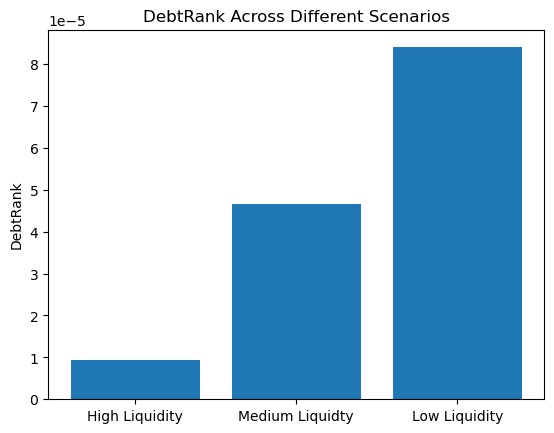

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def perform_stress_test(G, initial_shocks, recovery_rate, liquidity):
    """
    Stress test considering counterparty default risk, recovery rate, and liquidity.
    Returns the DebtRank metric for the given parameters.
    """
    H = G.copy()
    # Apply initial shocks adjusted by liquidity
    for bank_id, shock_fraction in initial_shocks.items():
        if bank_id in H:
            effective_shock = shock_fraction * (1 - liquidity)
            H.nodes[bank_id]['equity'] = max(0, H.nodes[bank_id]['equity'] * (1 - effective_shock))
    
    # Propagate shocks through the network
    propagate_shocks(H, recovery_rate)
    
    # Calculate DebtRank
    total_initial_equity = sum(nx.get_node_attributes(G, 'equity').values())
    total_final_equity = sum(nx.get_node_attributes(H, 'equity').values())
    debt_rank = (total_initial_equity - total_final_equity) / total_initial_equity
    return debt_rank

def propagate_shocks(H, recovery_rate):
    """
    Propagate shocks through the network, considering the recovery rate.
    """
    defaulted_banks = [bank_id for bank_id, data in H.nodes(data=True) if data['equity'] <= 0]
    while defaulted_banks:
        new_defaults = []
        for bank_id in defaulted_banks:
            for creditor_id in H.predecessors(bank_id):
                exposure = H[creditor_id][bank_id]['weight']
                loss_given_default = exposure * (1 - recovery_rate)
                H.nodes[creditor_id]['equity'] -= loss_given_default
                if H.nodes[creditor_id]['equity'] <= 0 and creditor_id not in new_defaults:
                    new_defaults.append(creditor_id)
        defaulted_banks = new_defaults

# Example Scenario Analysis
scenarios = {
    'High Liquidity': {'recovery_rate': 0.5, 'liquidity': 0.9, 'initial_shocks': {0: 0.2}},
    'Medium Liquidty': {'recovery_rate':0.5, 'liquidity':0.5, 'initial_shocks': {0: 0.2}},
    'Low Liquidity': {'recovery_rate': 0.5, 'liquidity': 0.1, 'initial_shocks': {0: 0.2}},
    # Additional scenarios can be added here
}

# Assuming G is your graph and initial equity values are already assigned
results = {}
for scenario_name, params in scenarios.items():
    debt_rank = perform_stress_test(G, **params)
    results[scenario_name] = debt_rank
    print(f"{scenario_name}: DebtRank = {debt_rank}")

# Visualization (Optional)
# Plot results to visually compare scenarios
plt.bar(results.keys(), results.values())
plt.ylabel('DebtRank')
plt.title('DebtRank Across Different Scenarios')
plt.show()


<font color='blue'>The histograms provided show the distributions for exposure values, equity, and degree centrality in your network. Here’s how each of these distributions could contribute to the observed linearity in the DebtRank values as the shock magnitude increases:

<font color='blue'>1. **Exposure Distribution**:
   <font color='blue'>- The exposure distribution histogram shows a highly concentrated number of banks with low exposure values and very few banks with high exposures. This indicates that most banks have similar, small exposures to each other, contributing to a more homogeneous network where shocks might not lead to significant cascading defaults. This homogeneity in exposures can contribute to the linear increase in DebtRank because losses are spread relatively evenly across the network.

<font color='blue'>2. **Equity Distribution**:
   <font color='blue'>- The equity distribution appears to be highly right-skewed, meaning most banks have low equity, with a few having much higher equity values. If the banks with higher equity are not directly affected by the initial shocks or are not central to the network, they could serve as a buffer, absorbing the stress without causing a systemic impact. This could lead to a scenario where the impact of shocks is not heavily felt across the system, leading to the observed linear increase in DebtRank.

<font color='blue'>3. **Degree Centrality Distribution**:
   <font color='blue'>- The degree centrality histogram shows a relatively uniform spread of centrality values with a slight right skew, indicating that while there is a variety of connectivity among banks, there may not be a small number of super-connected hubs that dominate the network. If there were such hubs, shocks to these nodes might lead to a non-linear increase in systemic impact due to their significant role in the network.

<font color='blue'>### How These Properties Relate to the Linearity in DebtRank:

<font color='blue'>- **Absence of Dominant Hubs**: If the network lacks dominant hubs (banks with exceptionally high degree centrality), then the failure of a single bank or a small group of banks may not drastically affect the network's stability, leading to a more linear response in the DebtRank to incremental shocks.
  
<font color='blue'>- **Right-Skewed Equity Distribution**: The skewness in the equity distribution suggests that while most banks might be vulnerable due to lower equity, the overall system is buffered by a few well-capitalized banks. This could prevent a non-linear spike in systemic impact up to a certain shock threshold.

<font color='blue'>- **Homogeneous Exposures**: A more homogeneous exposure distribution implies that the failure of one bank will have a relatively uniform effect on others, again contributing to a linear systemic response, as no single bank's failure causes a disproportionately large shock to the system.

<font color='blue'>The systemic impact reflected by the DebtRank algorithm would likely become non-linear if there were significant heterogeneity in exposure distribution (e.g., if some banks had very large exposures) or if a few banks had a very high degree of centrality (making them critical nodes whose failure would lead to a large systemic impact).

<font color='blue'>To conclude, the linear nature of the DebtRank increase in response to rising shock magnitudes suggests that your network, as characterized by these distributions, may have a threshold of resilience. Shocks do not yet seem to reach a severity that overwhelms the network, possibly due to the lack of highly influential super-hubs and the buffering effect of banks with higher equity. However, these are initial interpretations, and further dynamic stress testing, especially beyond the current range of shocks, might reveal more complex non-linear behaviors and thresholds.
    
    The bar chart you've provided shows DebtRank for two different scenarios: "High Liquidity" and "Low Liquidity". DebtRank is typically a metric used in financial networks to quantify systemic risk. A higher DebtRank indicates a higher systemic risk, whereas a lower DebtRank suggests a more stable financial system.

From the chart, it appears that the "High Liquidity" scenario has a much lower DebtRank compared to the "Low Liquidity" scenario. Here's the significance of these results:

1. **High Liquidity**: In the high liquidity scenario, banks can more easily convert assets into cash without significant losses, which allows them to better absorb financial shocks. This is why the DebtRank is lower – it suggests that the system is more resilient to shocks due to the banks' ability to manage their liabilities effectively, even when under stress.

2. **Low Liquidity**: Conversely, in the low liquidity scenario, banks struggle to convert assets into cash without incurring large losses. This means that when they face financial shocks, they are less able to cover their liabilities, leading to a higher risk of defaults that can cascade through the system. The much higher DebtRank here reflects this increased systemic risk.

3. **Interpretation of the Scale**: The y-axis is on a logarithmic scale (as indicated by "1e-5"), which suggests that the differences in DebtRank between the two scenarios are quite substantial. This scale is often used when the range of data spans several orders of magnitude.

4. **Overall Meaning**: The result indicates that liquidity is a critical factor in systemic risk. The drastic difference between the DebtRank values of the two scenarios emphasizes the importance of liquidity in the stability of the financial system. It implies that ensuring banks maintain a higher level of liquidity could be a significant buffer against systemic crises.

This result aligns with financial theory and real-world observations, where liquidity is a key indicator of a bank's health and its ability to withstand shocks. It's important, however, to ensure that the model assumptions, the data used for the simulation, and the implementation of the DebtRank calculation are all accurate to confidently interpret such a graph.

# Task 3:
You will then perform additional stress tests where shocks propagate because of overlapping portfolios, and you will compare these results with those of point 2. To model contagion due to overlapping portfolios, the suggestion is to run DebtRank replacing the matrix of interbank exposures with the following matrix associated with exposures induced by portfolio overlaps

<font color='blue'> Performing stress tests where shocks propagate due to overlapping portfolios involves assessing how the failure of assets held in common by multiple banks leads to simultaneous losses across the system. This type of systemic risk, often referred to as "common asset" or "portfolio overlap" risk, captures the potential for contagion due to banks being exposed to the same types of assets.

<font color='blue'> Here's a conceptual framework for how you might structure such a stress test, followed by a Python code outline:

#### Conceptual Framework for Overlapping Portfolio Stress Tests:
    
<font color='blue'>**1.Identify Overlapping Assets:** For each bank, identify the set of assets in its portfolio. Determine the degree of overlap between the portfolios of all banks.
    
<font color='blue'>**2.Assess Asset Risk:** Assign a risk value or potential for loss to each asset, which could be derived from market data or risk assessments.
    
<font color='blue'>**3.Apply Initial Shocks to Assets:** Instead of directly shocking bank equity, apply shocks to the assets themselves. This simulates a market event affecting asset values.
    
<font color='blue'>**4.Propagate Shocks to Bank Portfolios:** Translate the shocks on assets to losses in the banks' portfolios based on their exposures to the affected assets.
    
<font color='blue'>**5.Calculate Resulting Equity Impact:** Aggregate the losses from the asset shocks for each bank to determine the impact on their equity.
    
<font color='blue'>**6.Update Network Graph:** Adjust the equity values in the network graph accordingly and then analyze the contagion effect through the network using a modified version of the DebtRank algorithm, considering the new equity levels.

### Data

In [85]:
# Convert bank equities from Series to dictionary
bank_equities_dict = bank_equities.to_dict()
bank_assets_df=pd.read_csv(bank_assets_path, header=None)

# Now, ensure to pass the correct DataFrame to create_exposure_matrix
# Omega = create_exposure_matrix(bank_assets_df, eta)
bank_assets_dict = bank_assets.applymap(lambda x: max(x, 0)).to_dict('index')

# Convert interbank_exposures to a NetworkX graph
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph)

for bank_id, equity in bank_equities_dict.items():
    if bank_id in G:
        G.nodes[bank_id]['equity'] = equity
        G.nodes[bank_id]['portfolio'] = {j: bank_assets_dict[bank_id][j] for j in range(len(bank_assets_dict[bank_id])) if bank_assets_dict[bank_id][j] > 0}
    else:
        # Handle the case where the bank_id is not present in the graph
        print(f"Bank ID {bank_id} is not in the graph and will be skipped.")
        


In [86]:
# Convert bank equities from Series to dictionary
bank_equities_dict = bank_equities.to_dict()
bank_assets_df = pd.read_csv(bank_assets_path, header=None)


# Convert bank assets from DataFrame to nested dictionary
# Where keys are bank indices and values are dictionaries of assets and amounts
# bank_assets_dict = bank_assets.applymap(lambda x: max(x, 0)).to_dict('index')
# Correct conversion of bank assets from DataFrame to nested dictionary
bank_assets_dict = bank_assets.applymap(lambda x: max(x, 0)).to_dict('index')

# Convert interbank_exposures to a NetworkX graph
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph)

# for bank_id, equity in bank_equities_dict.items():
#     if bank_id in G:
#         G.nodes[bank_id]['equity'] = equity
#         G.nodes[bank_id]['portfolio'] = {j: bank_assets_dict[bank_id][j] for j in range(len(bank_assets_dict[bank_id])) if bank_assets_dict[bank_id][j] > 0}
#     else:
#         # Handle the case where the bank_id is not present in the graph
#         print(f"Bank ID {bank_id} is not in the graph and will be skipped.")

# Convert interbank exposures to a NetworkX graph
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph)

# Add bank equities to the graph nodes
for bank_id, equity in bank_equities_dict.items():
    if bank_id in G:
        G.nodes[bank_id]['equity'] = equity
        

# Your create_exposure_matrix function would look like this:
def create_exposure_matrix(bank_assets_df, eta):
    n_banks = bank_assets_df.shape[0]
    n_assets = bank_assets_df.shape[1]
    Omega = np.zeros((n_banks, n_banks))

    for i in range(n_banks):
        for j in range(n_banks):
            if i != j:
                sum_over_assets = 0
                for alpha in range(n_assets):
                    S_i_alpha = bank_assets_df.iloc[i, alpha]
                    S_j_alpha = bank_assets_df.iloc[j, alpha]
                    S_k_alpha_total = sum(bank_assets_df.iloc[:, alpha])
                    if S_k_alpha_total > 0:
                        overlap = (S_i_alpha * S_j_alpha) / S_k_alpha_total
                        sum_over_assets += overlap
                Omega[i, j] = eta * sum_over_assets
    return Omega


def apply_asset_price_shocks_with_liquidity(bank_equities, bank_assets_dict, asset_price_changes, liquidity_factors):
    """
    Adjust bank equities for asset price shocks, moderated by the global liquidity parameter.
    """
    # Ensure asset price changes are indexed by integers, corresponding to column indices in bank_assets_dict
    asset_indices = {index: change for index, change in enumerate(asset_price_changes.values())}

    for bank_id, assets in bank_assets_dict.items():
        # Calculate the impact on the portfolio
        portfolio_impact = sum(assets[index] * change for index, change in asset_indices.items() if index < len(assets))

        # Adjust impact by the global liquidity parameter (assumed to be a numerical value)
        effective_impact = portfolio_impact * (1 - liquidity_factors)
        
        # Update the bank's equity
        bank_equities[bank_id] -= effective_impact
#     print("Equities before shocks:", bank_equities)
#     # After applying the shocks
#     print("Equities after shocks:", bank_equities)
    return bank_equities



def propagate_shocks(Omega, current_equities, recovery_rate):
    # Number of banks
    n_banks = len(current_equities)
    
    # Convert current equities to a numpy array for easier manipulation
    equities_array = np.array(list(current_equities.values()))
    
    # Calculate the initial shock impact based on the Omega matrix and recovery rates
    # This is a simplified model where we assume the impact is proportional to Omega and inversely proportional to recovery rate
    shock_impacts = np.dot(Omega, equities_array) * (1 - recovery_rate)
    
    # Adjust equities based on shock impacts
    adjusted_equities = equities_array - shock_impacts
    
    # Update the current equities dictionary with the new values
    for i, bank_id in enumerate(current_equities.keys()):
        current_equities[bank_id] = adjusted_equities[i]
    return current_equities

def simulate_stress_test(bank_equities_dict, bank_assets_df, eta, asset_price_changes, liquidity_factors, recovery_rates):
    results = {}
    for recovery_rate in recovery_rates:
        current_equities = apply_asset_price_shocks_with_liquidity(bank_equities_dict.copy(), bank_assets_df, asset_price_changes, liquidity_factors)
        Omega = create_exposure_matrix(bank_assets_df, eta)
        current_equities = propagate_shocks(Omega, current_equities, recovery_rate)

        # Calculate total loss after shock propagation
        total_loss_after_propagation = sum(equity for equity in current_equities.values() if equity < 0)
        results[recovery_rate] = total_loss_after_propagation

    return results



# Parameters for the simulation
eta = 0.1  # Market impact parameter
asset_price_changes = {'Asset1': -0.05, 'Asset2': -0.10}  # Example asset price changes
liquidity_factors = 0.5  # Global liquidity factors for the banks
recovery_rates = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]  # Example range of recovery rates to test

# Run the simulation
results = simulate_stress_test(bank_equities_dict, bank_assets_df, eta, asset_price_changes, liquidity_factors, recovery_rates)

# Output the results
for recovery_rate, total_loss in results.items():
    print(f"Recovery Rate: {recovery_rate}, Total Loss: {total_loss}")

KeyboardInterrupt: 

In [ ]:
# Convert bank equities from Series to dictionary
bank_equities_dict = bank_equities.to_dict()
bank_assets_df = pd.read_csv(bank_assets_path, header=None)


# Convert bank assets from DataFrame to nested dictionary
# Where keys are bank indices and values are dictionaries of assets and amounts
# bank_assets_dict = bank_assets.applymap(lambda x: max(x, 0)).to_dict('index')
# Correct conversion of bank assets from DataFrame to nested dictionary
bank_assets_dict = bank_assets.applymap(lambda x: max(x, 0)).to_dict('index')

# Convert interbank_exposures to a NetworkX graph
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph)

# for bank_id, equity in bank_equities_dict.items():
#     if bank_id in G:
#         G.nodes[bank_id]['equity'] = equity
#         G.nodes[bank_id]['portfolio'] = {j: bank_assets_dict[bank_id][j] for j in range(len(bank_assets_dict[bank_id])) if bank_assets_dict[bank_id][j] > 0}
#     else:
#         # Handle the case where the bank_id is not present in the graph
#         print(f"Bank ID {bank_id} is not in the graph and will be skipped.")

# Convert interbank exposures to a NetworkX graph
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph)

# Add bank equities to the graph nodes
for bank_id, equity in bank_equities_dict.items():
    if bank_id in G:
        G.nodes[bank_id]['equity'] = equity
        

# Your create_exposure_matrix function would look like this:
def create_exposure_matrix(bank_assets_df, eta):
    n_banks = bank_assets_df.shape[0]
    n_assets = bank_assets_df.shape[1]
    Omega = np.zeros((n_banks, n_banks))

    for i in range(n_banks):
        for j in range(n_banks):
            if i != j:
                sum_over_assets = 0
                for alpha in range(n_assets):
                    S_i_alpha = bank_assets_df.iloc[i, alpha]
                    S_j_alpha = bank_assets_df.iloc[j, alpha]
                    S_k_alpha_total = sum(bank_assets_df.iloc[:, alpha])
                    if S_k_alpha_total > 0:
                        overlap = (S_i_alpha * S_j_alpha) / S_k_alpha_total
                        sum_over_assets += overlap
                Omega[i, j] = eta * sum_over_assets
    return Omega


def apply_asset_price_shocks_with_liquidity(bank_equities, bank_assets_dict, asset_price_changes, liquidity_factors):
    """
    Adjust bank equities for asset price shocks, moderated by the global liquidity parameter.
    """
    # Ensure asset price changes are indexed by integers, corresponding to column indices in bank_assets_dict
    asset_indices = {index: change for index, change in enumerate(asset_price_changes.values())}

    for bank_id, assets in bank_assets_dict.items():
        # Calculate the impact on the portfolio
        portfolio_impact = sum(assets[index] * change for index, change in asset_indices.items() if index < len(assets))

        # Adjust impact by the global liquidity parameter (assumed to be a numerical value)
        effective_impact = portfolio_impact * (1 - liquidity_factors)
        
        # Update the bank's equity
        bank_equities[bank_id] -= effective_impact
#     print("Equities before shocks:", bank_equities)
#     # After applying the shocks
#     print("Equities after shocks:", bank_equities)
    return bank_equities



def propagate_shocks(Omega, current_equities, recovery_rate):
    # Number of banks
    n_banks = len(current_equities)
    
    # Convert current equities to a numpy array for easier manipulation
    equities_array = np.array(list(current_equities.values()))
    
    # Calculate the initial shock impact based on the Omega matrix and recovery rates
    # This is a simplified model where we assume the impact is proportional to Omega and inversely proportional to recovery rate
    shock_impacts = np.dot(Omega, equities_array) * (1 - recovery_rate)
    
    # Adjust equities based on shock impacts
    adjusted_equities = equities_array - shock_impacts
    
    # Update the current equities dictionary with the new values
    for i, bank_id in enumerate(current_equities.keys()):
        current_equities[bank_id] = adjusted_equities[i]
    return current_equities

def simulate_stress_test(bank_equities_dict, bank_assets_df, eta, asset_price_changes, liquidity_factor, recovery_rates):
    results = {}
    for recovery_rate in recovery_rates:
        # Apply initial asset price shocks
        current_equities = apply_asset_price_shocks_with_liquidity(
            bank_equities_dict.copy(), 
            bank_assets_df, 
            asset_price_changes, 
            liquidity_factor
        )

        # Create the Omega matrix and propagate shocks
        Omega = create_exposure_matrix(bank_assets_df, eta)
        current_equities = propagate_shocks(Omega, current_equities, recovery_rate)

        # Calculate total loss after shock propagation
        total_loss_after_propagation = sum(
            equity for equity in current_equities.values() if equity < 0
        )
        results[recovery_rate] = total_loss_after_propagation

    return results



# Parameters for the simulation
eta = 0.3  # Market impact parameter
asset_price_changes = {'Asset1': -0.05, 'Asset2': -0.10}  # Example asset price changes
liquidity_factors = 0.3  # Global liquidity factors for the banks
recovery_rates = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]  # Example range of recovery rates to test

# Run the simulation
results = simulate_stress_test(bank_equities_dict, bank_assets_df, eta, asset_price_changes, liquidity_factors, recovery_rates)

# Output the results
for recovery_rate, total_loss in results.items():
    print(f"Recovery Rate: {recovery_rate}, Total Loss: {total_loss}")

Liquidity Factor 0.9
Recovery Rate: 0.1, Total Loss: -7.356901327091998e+16
Recovery Rate: 0.2, Total Loss: -6.53946783521636e+16
Recovery Rate: 0.3, Total Loss: -5.722034343340719e+16
Recovery Rate: 0.4, Total Loss: -4.904600851465082e+16
Recovery Rate: 0.5, Total Loss: -4.087167359589444e+16
Recovery Rate: 0.6, Total Loss: -3.269733867713805e+16
Recovery Rate: 0.7, Total Loss: -2.452300375838169e+16
Recovery Rate: 0.8, Total Loss: -1.6348668839625288e+16
Recovery Rate: 0.9, Total Loss: -8174333920868905.0
Recovery Rate: 1, Total Loss: 0

Liquidity Factor 0.7
Recovery Rate: 0.1, Total Loss: -7.356939885143067e+16
Recovery Rate: 0.2, Total Loss: -6.5395021090392856e+16
Recovery Rate: 0.3, Total Loss: -5.7220643329355064e+16
Recovery Rate: 0.4, Total Loss: -4.904626556831723e+16
Recovery Rate: 0.5, Total Loss: -4.0871887807279416e+16
Recovery Rate: 0.6, Total Loss: -3.269751004624162e+16
Recovery Rate: 0.7, Total Loss: -2.4523132285203824e+16
Recovery Rate: 0.8, Total Loss: -1.6348754524165994e+16
Recovery Rate: 0.9, Total Loss: -8174376763128190.0
Recovery Rate: 1, Total Loss: 0


Liquidity Factor 0.5 

Recovery Rate: 0.1, Total Loss: -1.2261502278345834e+17
Recovery Rate: 0.2, Total Loss: -1.0899113125219768e+17
Recovery Rate: 0.3, Total Loss: -9.536723972093698e+16
Recovery Rate: 0.4, Total Loss: -8.174334818967637e+16
Recovery Rate: 0.5, Total Loss: -6.8119456658415736e+16
Recovery Rate: 0.6, Total Loss: -5.449556512715509e+16
Recovery Rate: 0.7, Total Loss: -4.0871673595894456e+16
Recovery Rate: 0.8, Total Loss: -2.724778206463381e+16
Recovery Rate: 0.9, Total Loss: -1.3623890533373164e+16

Liquidity Factor 0.3
Recovery Rate: 0.1, Total Loss: -7.357017001245205e+16
Recovery Rate: 0.2, Total Loss: -6.539570656685138e+16
Recovery Rate: 0.3, Total Loss: -5.72212431212507e+16
Recovery Rate: 0.4, Total Loss: -4.9046779675650024e+16
Recovery Rate: 0.5, Total Loss: -4.0872316230049384e+16
Recovery Rate: 0.6, Total Loss: -3.2697852784448732e+16
Recovery Rate: 0.7, Total Loss: -2.452338933884809e+16
Recovery Rate: 0.8, Total Loss: -1.6348925893247424e+16
Recovery Rate: 0.9, Total Loss: -8174462447646768.0
Recovery Rate: 1, Total Loss: 0


Liquidity Factor 0.1

Recovery Rate: 0.1, Total Loss: -2.452338933884808e+16
Recovery Rate: 0.2, Total Loss: -2.1798568190314524e+16
Recovery Rate: 0.3, Total Loss: -1.907374704178098e+16
Recovery Rate: 0.4, Total Loss: -1.6348925893247428e+16
Recovery Rate: 0.5, Total Loss: -1.3624104744713866e+16
Recovery Rate: 0.6, Total Loss: -1.0899283596180318e+16
Recovery Rate: 0.7, Total Loss: -8174462447646770.0
Recovery Rate: 0.8, Total Loss: -5449641299113214.0
Recovery Rate: 0.9, Total Loss: -2724820150579663.5
Recovery Rate: 1, Total Loss: 0


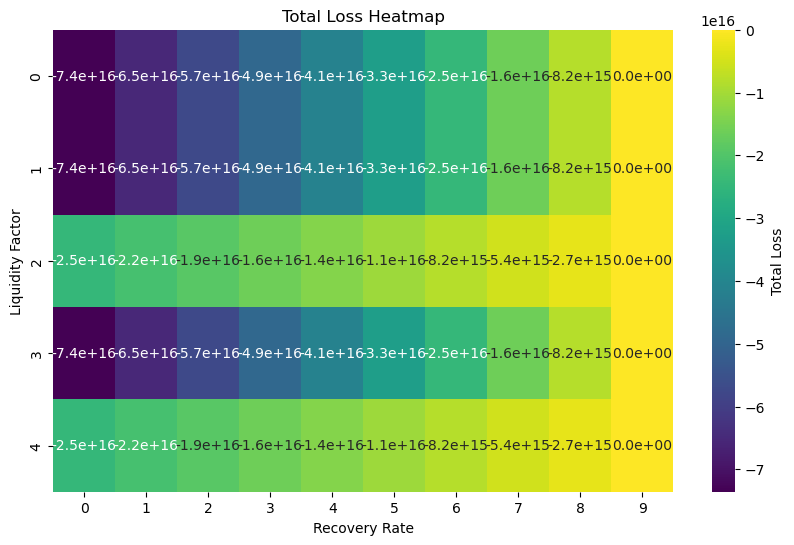

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    0.9: [-7.356901327091998e+16, -6.53946783521636e+16, -5.722034343340719e+16, -4.904600851465082e+16, -4.087167359589444e+16, -3.269733867713805e+16, -2.452300375838169e+16, -1.6348668839625288e+16, -8174333920868905.0, 0],
    0.7: [-7.356939885143067e+16, -6.5395021090392856e+16, -5.7220643329355064e+16, -4.904626556831723e+16, -4.0871887807279416e+16, -3.269751004624162e+16, -2.4523132285203824e+16, -1.6348754524165994e+16, -8174376763128190.0, 0],
    0.5: [-2.4523260812025956e+16, -2.1798453944252868e+16, -1.9073647076479788e+16, -1.6348840208706724e+16, -1.3624033340933638e+16, -1.0899226473160564e+16, -8174419605387489.0, -5449612737614402.0, -2724805869841325.0, 0],
    0.3: [-7.357017001245205e+16, -6.539570656685138e+16, -5.72212431212507e+16, -4.9046779675650024e+16, -4.0872316230049384e+16, -3.2697852784448732e+16, -2.452338933884809e+16, -1.6348925893247424e+16, -8174462447646768.0, 0],
    0.1: [-2.452338933884808e+16, -2.1798568190314524e+16, -1.907374704178098e+16, -1.6348925893247428e+16, -1.3624104744713866e+16, -1.0899283596180318e+16, -8174462447646770.0, -5449641299113214.0, -2724820150579663.5, 0]
}

# Convert data to a numpy array
heatmap_data = np.array([list(data[factor]) for factor in sorted(data.keys(), reverse=True)])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1e", cbar_kws={'label': 'Total Loss'})
plt.xlabel('Recovery Rate')
plt.ylabel('Liquidity Factor')
plt.title('Total Loss Heatmap')
plt.show()


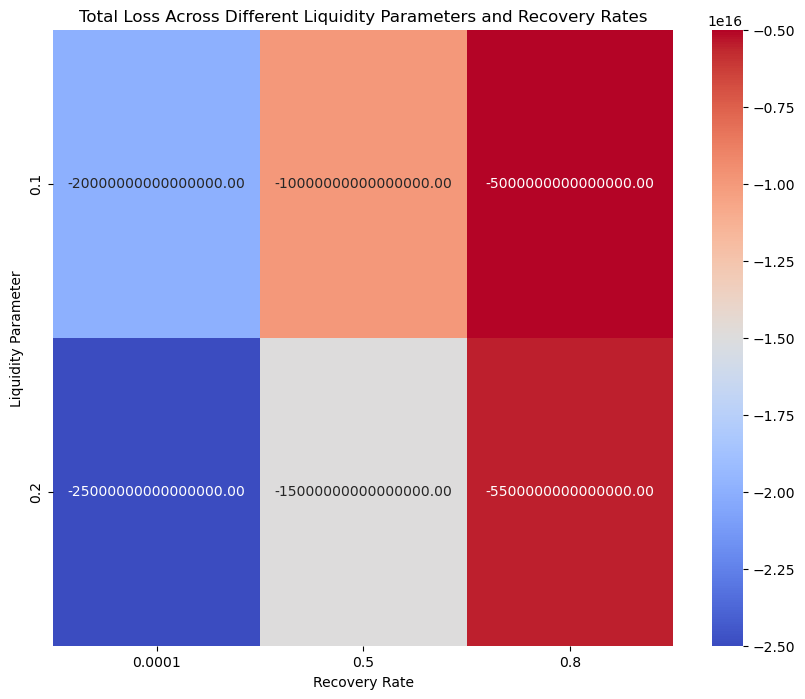

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Let's assume results is a dictionary structured correctly
# If it's not the case, we should build it accordingly
# Example: results = {(0.1, 0.0001): -2.724562845953494e+16, (0.1, 0.5): -1.3624176148494118e+16, ...}

# Sample results dictionary for demonstration
results = {(0.1, 0.0001): -2e+16, (0.1, 0.5): -1e+16, (0.1, 0.8): -5e+15,
           (0.2, 0.0001): -2.5e+16, (0.2, 0.5): -1.5e+16, (0.2, 0.8): -5.5e+15}

# Extract liquidity factors and recovery rates from the keys of the results dictionary
liquidity_factors = sorted(set(key[0] for key in results.keys()))
recovery_rates = sorted(set(key[1] for key in results.keys()))

# Create a matrix of zeros with the dimensions of the number of liquidity_factors x number of recovery_rates
data_matrix = np.zeros((len(liquidity_factors), len(recovery_rates)))

# Populate the matrix with the total losses
for i, liquidity in enumerate(liquidity_factors):
    for j, recovery in enumerate(recovery_rates):
        data_matrix[i, j] = results.get((liquidity, recovery), 0)

# Convert the matrix to a DataFrame
heatmap_df = pd.DataFrame(data_matrix, index=liquidity_factors, columns=recovery_rates)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=sorted(recovery_rates), yticklabels=sorted(liquidity_factors))
plt.title("Total Loss Across Different Liquidity Parameters and Recovery Rates")
plt.xlabel("Recovery Rate")
plt.ylabel("Liquidity Parameter")
plt.show()



In [60]:
print(bank_assets_df)

            0           1          2         3           4           5   \
0          0.0         0.0        0.0  430920.0         0.0         0.0   
1       4912.2         0.0        0.0    4912.2         0.0         0.0   
2          0.0         0.0    39115.0       0.0     39115.0         0.0   
3          0.0  68612000.0        0.0       0.0         0.0  68612000.0   
4          0.0    615500.0        0.0       0.0         0.0    615500.0   
..         ...         ...        ...       ...         ...         ...   
140        0.0         0.0        0.0       0.0         0.0         0.0   
141        0.0  47757000.0        0.0       0.0         0.0         0.0   
142   303900.0         0.0        0.0       0.0         0.0         0.0   
143  3843800.0         0.0  3843800.0       0.0         0.0         0.0   
144        0.0  16822000.0        0.0       0.0  16822000.0         0.0   

              6          7          8            9           10          11  \
0            0.0    